# Q-2 IDIAL LOW PASS AND HIGH PASS FILTERING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import cv2
from numpy import linalg as LA
from scipy import signal as s
#Calculating FFT then shifting it to origin of image and then finally calculating the absolute value
img = cv2.imread('F:/dip/c3.jpg',0) 
figure=plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow((img),cmap='Greys_r')
plt.title('original image')
rows=img.shape[0]
cols=img.shape[1]
if (rows%2==0 and cols%2!=0):
    img=np.concatenate((img,np.zeros((1,cols))),axis=0)
if (rows%2!=0 and cols%2==0):
    img=np.concatenate((img,np.zeros((rows,1))),axis=1)
if (rows%2!=0 and cols%2!=0):
    img=np.concatenate((img,np.zeros((1,cols))),axis=0)
    img=np.concatenate((img,np.zeros((rows+1,1))),axis=1)
[rows,cols]=img.shape
img = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
img=np.double(img)
A=np.fft.fft2(img)
plt.subplot(1,3,2)
plt.imshow(np.uint8(abs(A)),cmap='Greys_r')
plt.title('fourier image')
A1=np.fft.fftshift(A)
Abs=abs(A1)
plt.subplot(1,3,3)
plt.imshow(np.uint8(Abs),cmap='Greys_r')
plt.title('fftshift image ')
print(rows,cols)
print(A1.shape)
print(Abs.shape)



226 226
(226, 226)
(226, 226)


Enter horizontal cutoff= 40
Enter vertical cutoff= 40
(226, 226)
(226, 226)


Text(0.5, 1.0, 'Image after passing through low pass filter')

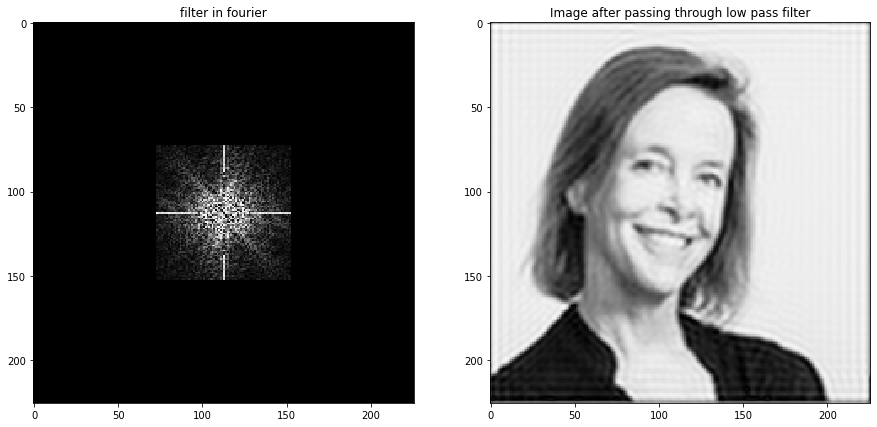

In [2]:
horz=int(input('Enter horizontal cutoff= '))
vert=int(input('Enter vertical cutoff= '))

#-----------------------------------------------for Low pass filter----------------------------------------------- 
w=(rows-2*horz)/2
x=(cols-2*vert)/2
temp1=np.zeros((int(w),int(cols)))
temp2=np.zeros((2*horz,int(x)))
d1=np.concatenate((temp2, np.ones((2*horz, 2*vert)), temp2), axis=1)
d2=np.concatenate((temp1,d1,temp1), axis=0)
print(d2.shape)
#computing the FFT of Low pass image
finalfft=np.multiply(d2,(A1))
#Inverse FFT step
figure=plt.figure(figsize=(15,15))
B=np.fft.fftshift(finalfft)
B1=np.fft.ifft2(B)
B2=abs(B1)
print(B2.shape)
plt.subplot(1,2,1),plt.imshow(np.uint8(abs(finalfft)),cmap='Greys_r')
plt.title('filter in fourier')
plt.subplot(1,2,2),plt.imshow(B2,cmap='Greys_r')
plt.title('Image after passing through low pass filter')



Enter horizontal cutoff= 40
Enter vertical cutoff= 40
(226, 226)
(226, 226)


Text(0.5, 1.0, 'Image after passing through high pass filter')

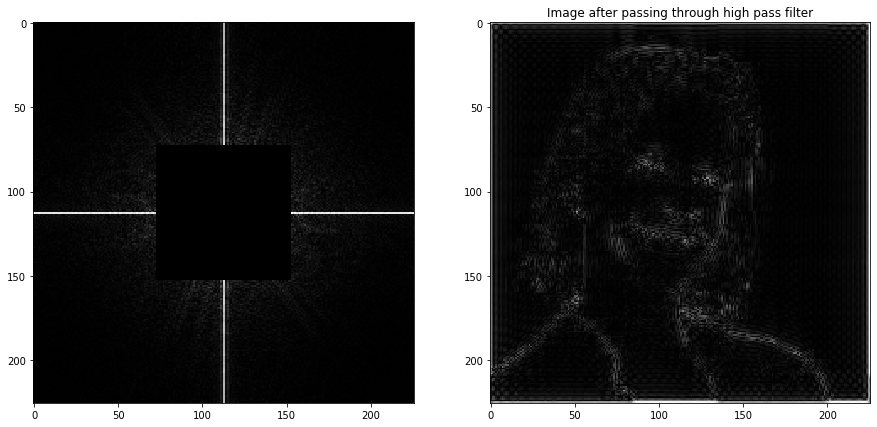

In [3]:
horz=int(input('Enter horizontal cutoff= '))
vert=int(input('Enter vertical cutoff= '))
#------------------------------------------------high pass filter_----------------------------------------------------
w=(rows-2*horz)/2
x=(cols-2*vert)/2
temp1=np.ones((int(w),int(cols)))
temp2=np.ones((2*horz,int(x)))
d1=np.concatenate((temp2, np.zeros((2*horz, 2*vert)), temp2), axis=1)
d2=np.concatenate((temp1,d1,temp1), axis=0)
print(d2.shape)
#computing the FFT of Low pass image
finalfft=np.multiply(d2,(A1))
#Inverse FFT step
figure=plt.figure(figsize=(15,15))
B=np.fft.fftshift(finalfft)
B1=np.fft.ifft2(B)
B2=abs(B1)
print(B2.shape)
plt.subplot(1,2,1),plt.imshow(np.uint8(abs(finalfft)),cmap='Greys_r')
plt.subplot(1,2,2),plt.imshow(B2,cmap='Greys_r')
plt.title('Image after passing through high pass filter')


# Q-2    Gausian low pass and high pass filtering 

enter the value of varience= 50
0.9996000799893344


Text(0.5, 1.0, 'fftshift image ')

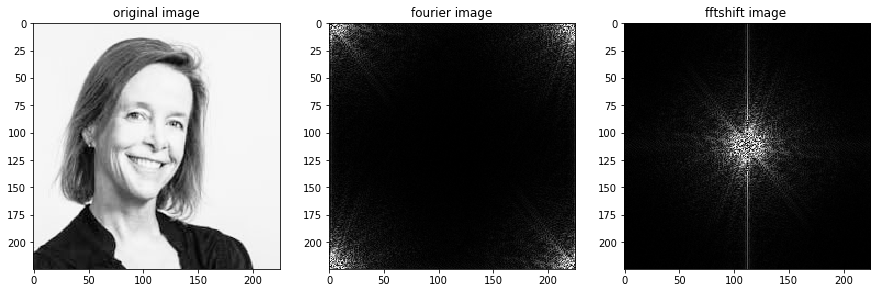

In [11]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy import exp

x=list(np.linspace(-112, 112, num=225))#, retstep=True))
y=list(np.linspace(-112, 112, num=225))#, retstep=True)
sigma=float(input('enter the value of varience= '))
ver=math.sqrt(1/(2*3.14*sigma))
ker=np.zeros((225,225),float)
for i in range (225):
    for j in range (225):
        var1=(-1)*(((x[i]**2)+(y[j]**2))/(2*(sigma**2)))
        var2=exp(var1)
        #var2=var2/ver
        ker[i,j]=var2
print(ker[113,113])
#------------------------------------------------------------------------------------------------------------
img = cv2.imread('F:/dip/c3.jpg',0)
figure=plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow((img),cmap='Greys_r')
plt.title('original image')
[rows,cols]=img.shape
img = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
img=np.double(img)
A=np.fft.fft2(img)
plt.subplot(1,3,2)
plt.imshow(np.uint8(abs(A)),cmap='Greys_r')
plt.title('fourier image')
A1=np.fft.fftshift(A)
Abs=abs(A1)
plt.subplot(1,3,3)
plt.imshow(np.uint8(Abs),cmap='Greys_r')
plt.title('fftshift image ')




(225, 225)


Text(0.5, 1.0, 'Image after passing through gausian low pass filter')

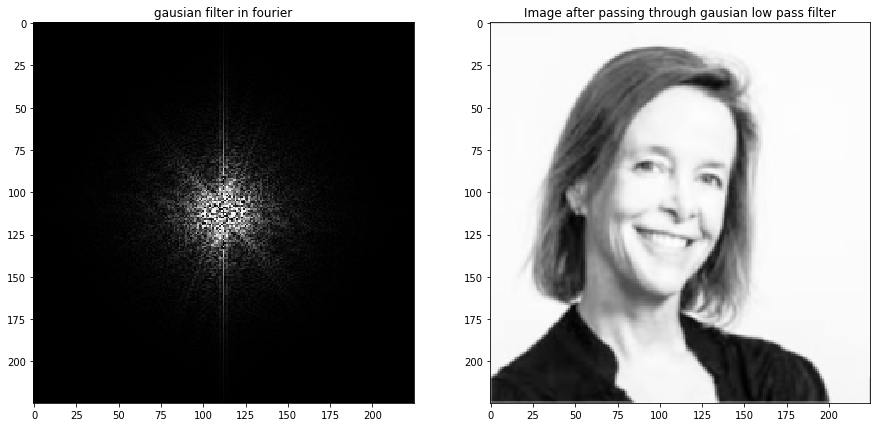

In [12]:
finalfft=np.multiply(A1,ker)
#Inverse FFT step
figure=plt.figure(figsize=(15,15))
B=np.fft.fftshift(finalfft)
B1=np.fft.ifft2(B)
B2=abs(B1)
print(B2.shape)
plt.subplot(1,2,1),plt.imshow(np.uint8(abs(finalfft)),cmap='Greys_r')
plt.title('gausian filter in fourier')
plt.subplot(1,2,2),plt.imshow(B2,cmap='Greys_r')
plt.title('Image after passing through gausian low pass filter')


[[0.0066204  0.00692235 0.00723518 ... 0.00723518 0.00692235 0.0066204 ]
 [0.00692235 0.00723807 0.00756517 ... 0.00756517 0.00723807 0.00692235]
 [0.00723518 0.00756517 0.00790705 ... 0.00790705 0.00756517 0.00723518]
 ...
 [0.00723518 0.00756517 0.00790705 ... 0.00790705 0.00756517 0.00723518]
 [0.00692235 0.00723807 0.00756517 ... 0.00756517 0.00723807 0.00692235]
 [0.0066204  0.00692235 0.00723518 ... 0.00723518 0.00692235 0.0066204 ]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


Text(0.5, 1.0, 'fftshift image ')

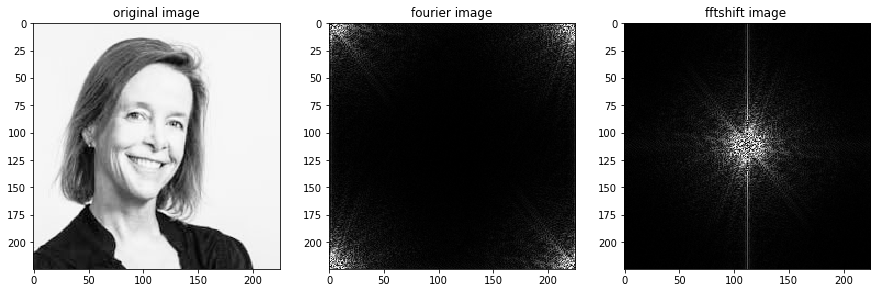

In [13]:

# x=list(np.linspace(-112, 112, num=225))#, retstep=True))
# y=list(np.linspace(-112, 112, num=225))#, retstep=True)
# sigma=float(input('enter the value of varience= '))
# ver=math.sqrt(1/(2*3.14*sigma))
# ker=np.zeros((225,225),float)
# for i in range (225):
#     for j in range (225):
#         var1=(-1)*(((x[i]**2)+(y[j]**2))/(2*(sigma**2)))
#         var2=exp(var1)
#         #var2=var2*ver
#         ker[i,j]=var2
print(ker)
temp=np.ones((225,225),float)
ker1=temp-ker
print(temp)
#------------------------------------------------------------------------------------------------------------
img = cv2.imread('F:/dip/c3.jpg',0)
figure=plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow((img),cmap='Greys_r')
plt.title('original image')
[rows,cols]=img.shape
img = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
img=np.double(img)
A=np.fft.fft2(img)
plt.subplot(1,3,2)
plt.imshow(np.uint8(abs(A)),cmap='Greys_r')
plt.title('fourier image')
A1=np.fft.fftshift(A)
Abs=abs(A1)
plt.subplot(1,3,3)
plt.imshow(np.uint8(Abs),cmap='Greys_r')
plt.title('fftshift image ')








(225, 225)


Text(0.5, 1.0, 'Image after passing through gausian low pass filter')

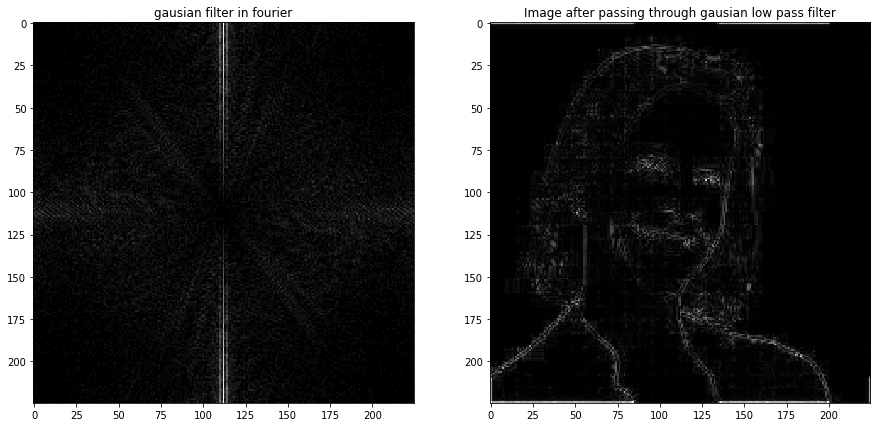

In [10]:

finalfft=np.multiply(ker1,A1)
#Inverse FFT step
figure=plt.figure(figsize=(15,15))
B=np.fft.fftshift(finalfft)
B1=np.fft.ifft2(B)
B2=abs(B1)
print(B2.shape)
plt.subplot(1,2,1),plt.imshow(np.uint8(abs(finalfft)),cmap='Greys_r')
plt.title('gausian filter in fourier')
plt.subplot(1,2,2),plt.imshow(B2,cmap='Greys_r')
plt.title('Image after passing through gausian high pass filter')
